In [ ]:
# What is the average movie duration?
# Sort movies based on duration
# How many movies have ratings?
# Remove no values from some columns and replace them with some other content
# What are the top rated movies?
# Relationship between rating and duration

#imbd_rating.csv

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
movies_dframe = pd.read_csv('imbd_rating.csv')

In [3]:
movies_dframe.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies_dframe.tail()

,star_rating,title,content_rating,genre,duration,actors_list
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [5]:
movies_dframe.shape

(979, 6)

In [10]:
movies_dframe.duration.mean()

120.97957099080695

In [7]:
msorted = movies_dframe.sort('duration')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [9]:
msorted.tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


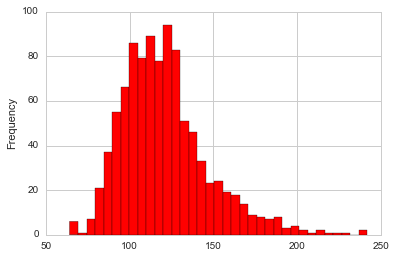

In [13]:
movies_dframe.duration.plot(kind = 'hist', color = 'red', bins = 35)

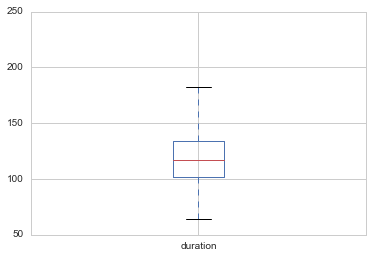

In [14]:
movies_dframe.duration.plot(kind = 'box')

In [15]:
x = movies_dframe.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

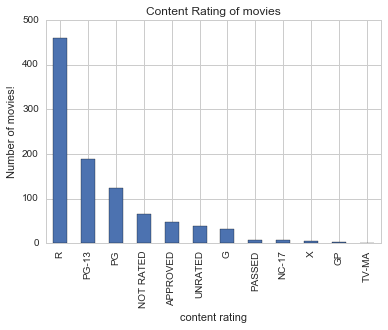

In [18]:
movies_dframe.content_rating.value_counts().plot(kind = 'bar', title = "Content Rating of movies")

plt.xlabel("content rating")
plt.ylabel('Number of movies!')

In [19]:
movies_dframe.content_rating.replace(['APPROVED','NOT RATED','GP','PASSED'], 'UNRATED', inplace = True)

movies_dframe.content_rating.replace(['TV-MA','X'], 'NC-17', inplace = True)

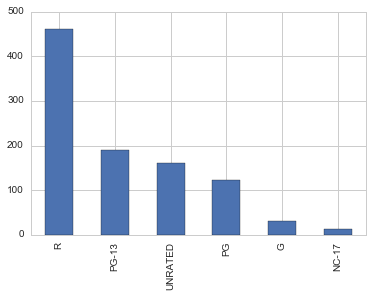

In [23]:
movies_dframe.content_rating.value_counts().plot(kind = 'bar')

In [24]:
movies_dframe.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [25]:
movies_dframe[movies_dframe.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [26]:
movies_dframe.content_rating.fillna('UNRATED', inplace = True)

In [27]:
movies_dframe.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [28]:
movies_dframe[movies_dframe.duration >= 121].star_rating.mean()

7.953669724770622

In [29]:
movies_dframe[movies_dframe.duration < 121].star_rating.mean()

7.8384898710865345

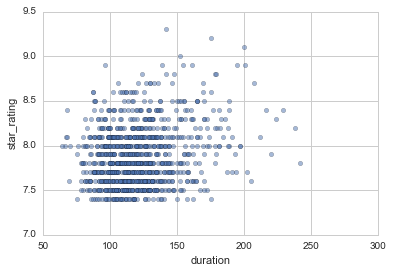

In [33]:
movies_dframe.plot(kind = 'scatter', x = 'duration', y = 'star_rating', alpha = 0.5)

In [35]:
movies_dframe.sort('star_rating', ascending = False).title.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [38]:
movies_dframe.sort('star_rating', ascending = False).groupby('genre').title.head(1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


0                           The Shawshank Redemption
3                                    The Dark Knight
5                                       12 Angry Men
6                     The Good, the Bad and the Ugly
7      The Lord of the Rings: The Return of the King
8                                   Schindler's List
39                                            Psycho
38                                       Rear Window
35                                      Modern Times
30                                     Spirited Away
105                                    The Third Man
145                                     Blade Runner
350                                Shadow of a Doubt
338                              Battleship Potemkin
468                       E.T. the Extra-Terrestrial
638                        The City of Lost Children
Name: title, dtype: object

In [43]:
av_rating = movies_dframe.groupby('genre').star_rating.agg(['count', 'mean'])
av_rating[av_rating['count'] >= 20]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
